# Newtons metode

**TMA4400 Matematikk 1: Kalkulus og lineær algebra**

Dato: **13. oktober 2025**

## Newtons metode

Tidligere så vi at $x_0$ er en rot eller et nullpunkt til $f(x)$ dersom

$$
f(x_0)=0.
$$

Ideen i Newtons metode er å bytte ut funksjonen $f(x)$ med den lineære tilnærmingen av $f(x)$ om punktet $x=a_n$:

$$
f(x)\approx f(a_n)+f'(a_n)(x-a_n).
$$

Vi får da

$$
f(a_n)+f'(a_n)(x-a_n)=0 \qquad\Longleftrightarrow\qquad x=a_n-\frac{f(a_n)}{f'(a_n)}
$$

Nå bør da $x$ være en approksimasjon av $x_0$, og vi lar derfor $x=a_{n+1}$. Dette gir oss den rekursive følgen

$$
a_{n+1}=a_n-\frac{f(a_n)}{f'(a_n)},\qquad\text{med initialverdien $a_0$.}
$$

La oss implementere Newtons metode for 

$$
f(x)=x^2-2,
$$

med $f'(x)=2x$.

In [1]:
import numpy as np

# generisk newtons metode
def newton(F, dF, a, toleranse = 1.0E-10, N = 500):
    Fa = F(a)
    dFa = dF(a)
    n = 0
    punkter = [(a, Fa)] 
    while abs(Fa-0) >= toleranse and n < N: # vi gjør dette mens |F(x)-0|>=toleranse og n<N
        a = a-Fa/dFa   # ny initialverdi
        n = n+1        # ny n
        Fa = F(a)      # ny F(x)
        dFa = dF(a)    # ny dF(x)
        punkter.append((a, Fa))
    if n >= N:
        print("Fant ikke fikspunkt for gitt startverdi. Returnerer nåværende verdier.")
        return punkter
    else: 
        return punkter

In [2]:
# definerer funksjonen vi skal bruke
def F(x):
    return x**2-2 # vi bruker f(x)

def dF(x):
    return 2*x # vi bruker f'(x)

a_0 = 9 # en mulig initialverdi

# finner fikspunkt med gitt initialverdi
punkter = newton(F, dF, a_0)

# skriver ut punkter
n = 0
for punkt in punkter:
    print("n = {:3d},\t x = {:1.15f},\t F(x) = {:1.15f}".format(n,*punkt))
    n = n+1

n =   0,	 x = 9.000000000000000,	 F(x) = 79.000000000000000
n =   1,	 x = 4.611111111111111,	 F(x) = 19.262345679012341
n =   2,	 x = 2.522423025435073,	 F(x) = 4.362617919245030
n =   3,	 x = 1.657655721288586,	 F(x) = 0.747822490320783
n =   4,	 x = 1.432089434900886,	 F(x) = 0.050880149554738
n =   5,	 x = 1.414325129015108,	 F(x) = 0.000315570563603
n =   6,	 x = 1.414213566773468,	 F(x) = 0.000000012446134
n =   7,	 x = 1.414213562373095,	 F(x) = 0.000000000000000


#### Eksempel

Bruk Newtons metode til å løse 

$$
f(x)=x^3+x^2-3x-3=0.
$$ 

Velg $a_0=2$.

In [3]:
# definerer funksjonen vi skal bruke
def F(x):
    return x**3+x**2-3*x-3 # vi bruker f(x)

def dF(x):
    return 3*x**2+2*x-3 # vi bruker f'(x)

a_0 = 2 # en mulig initialverdi

# finner fikspunkt med gitt initialverdi
punkter = newton(F, dF, a_0)

# skriver ut punkter
n = 0
for punkt in punkter:
    print("n = {:3d},\t x = {:1.15f},\t F(x) = {:1.15f}".format(n,*punkt))
    n = n+1

n =   0,	 x = 2.000000000000000,	 F(x) = 3.000000000000000
n =   1,	 x = 1.769230769230769,	 F(x) = 0.360491579426490
n =   2,	 x = 1.732923810396993,	 F(x) = 0.008266910438978
n =   3,	 x = 1.732051306108974,	 F(x) = 0.000004718235672
n =   4,	 x = 1.732050807569040,	 F(x) = 0.000000000001539


Vi kontrollerer ved å plotte den aktuelle funksjonen:

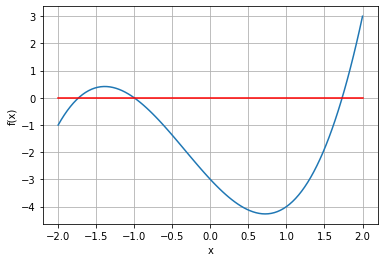

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# plotter funksjonen på et intervall 
x = np.linspace(-2, 2, 101)     # antall x-verdier i intervallet [-2,2]
plt.plot(x, F(x))               # plotter funksjonen f(x) i blått
plt.plot(x, 0*x, 'r')           # plotter x-aksen i rødt
plt.xlabel('x')
plt.grid(True)
plt.ylabel('f(x)');

Legg merke til at det er $2$ andre nullpunkt også, men vi finner det nullpunktet som er nærme initialverdien $a_0=2$.

### Newtons metode er en fikspunktiterasjon

Hvis vi lar 

$$
F(x)=x-\frac{f(x)}{f'(x)}
$$

ser vi at Newtons metode er en fikspunktiterasjon gitt ved 

$$
a_{n+1}=F(a_n).
$$

Konvergens- og feilanalysen vi gjorde for fikspunktiterasjoner gjelder da også for Newtons metode. Vi legger også merke til at

$$
F'(x)=\frac{f(x)f''(x)}{(f'(x))^2}.
$$

Dette betyr at i fikspunktet, $r$, som da er nullpunktet til funksjonen $f(x)$, har vi automatisk at $F'(r)=0$.

Sammenlignet med fikspunktiterasjoner, som generelt sett har konvergensorden lik $1$, vil altså Newtons metode generelt sett ha konvergensorden lik $2$.

---

**Teorem.** Anta at $f(x)$, $f'(x)$ og $f''(x)$ alle er kontinuerlige funksjoner, og at $r$ er slik at $f(r)=0$, $f'(r)\neq0$ og $f''(r)\neq 0$. Da konvergerer Newtons metode mot $r$ for alle initialverdier $a_0$ som starter nærme nok $r$, og 

$$
\lim_{n\to\infty}\frac{e_{n+1}}{(e_n)^2}=\frac{1}{2}\left|\frac{f''(r)}{f'(r)}\right|.
$$


---

Beviset av den siste delen av teoremet skal vi gjøre i Innlevering 3.